### We started from sample question 1, and got interested in the impact of MPOWER for every other countries
### Since our team were trying to analyze the impact of MPOWER, we focused on stop_smoking.csv in terms of looking at MPOWER, and tobacco use worlwide in terms of result of MPOWER


### For death rate, it would be hard to assume direct impact of MPOWER, since death rate should be considered as a long-term result. Given dataset of small years, the direct impact of MPOWER to death rate would not be representative and pursuasive

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to see the result of plot graph in same screen
%matplotlib inline

death_df = pd.read_csv('./death_rates_smoking_age.csv')
sales_df = pd.read_csv('./sales_per_day.csv')
stop_df = pd.read_csv('./stop_smoking.csv')
production_df = pd.read_csv('./tobacco_production.csv')
production_txt = pd.read_csv('./tobacco_production_footnotes.txt')
use_us_df = pd.read_csv('./tobacco_use_us.csv')
use_ww_df = pd.read_csv('./tobacco_use_ww.csv')
us_disease_df = pd.read_csv('./us_chronic_resp_disease.csv')

In [2]:
# Starting from stop_smoking.csv file
stop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       774 non-null    object 
 1   Code                         774 non-null    object 
 2   Year                         774 non-null    int64  
 3   AvgCigarettePriceDollars     208 non-null    float64
 4   AvgTaxesAsPctCigarettePrice  209 non-null    float64
 5   EnforceBansTobaccoAd         774 non-null    int64  
 6   HelpToQuit                   774 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 42.5+ KB


In [3]:
# there are some null values in price columns
stop_df.isnull().sum()

Entity                           0
Code                             0
Year                             0
AvgCigarettePriceDollars       566
AvgTaxesAsPctCigarettePrice    565
EnforceBansTobaccoAd             0
HelpToQuit                       0
dtype: int64

In [4]:
# Checking year column: 2007, 2010, 2012, and 2014 data 
stop_df['Year'].value_counts().sort_index()

2007    193
2010    193
2012    194
2014    194
Name: Year, dtype: int64

In [5]:
# We can check that total average for cigarette price is 4.3, 
# total average taxes is 57.3, Enforce ban tobacco advertising is 3.3
# and Help to quit is 3.5
stop_df.describe()

,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
count,774.000000,208.000000,209.000000,774.000000,774.000000
mean,2010.755814,4.336394,57.339234,3.313953,3.493540
std,2.587373,2.534659,20.403278,1.088995,0.807042
min,2007.000000,0.000000,0.000000,2.000000,1.000000
25%,2010.000000,2.195000,42.900000,2.000000,3.000000
50%,2012.000000,4.155000,62.400000,4.000000,4.000000
75%,2013.500000,5.767500,75.200000,4.000000,4.000000
max,2014.000000,13.000000,86.400000,5.000000,5.000000


In [49]:
round(stop_df[['AvgCigarettePriceDollars', 'AvgTaxesAsPctCigarettePrice', 'EnforceBansTobaccoAd', 'HelpToQuit']].describe(),2)

,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
count,208.00,209.00,774.00,774.00
mean,4.34,57.34,3.31,3.49
std,2.53,20.40,1.09,0.81
min,0.00,0.00,2.00,1.00
25%,2.20,42.90,2.00,3.00
50%,4.16,62.40,4.00,4.00
75%,5.77,75.20,4.00,4.00
max,13.00,86.40,5.00,5.00


In [7]:
# Trend as MPOWER by all means are increasing by yearly basis

e_2007, h_2007 = stop_df[stop_df['Year']==2007][['EnforceBansTobaccoAd', 'HelpToQuit']].mean()
e_2010, h_2010 = stop_df[stop_df['Year']==2010][['EnforceBansTobaccoAd', 'HelpToQuit']].mean()
e_2012, h_2012 = stop_df[stop_df['Year']==2012][['EnforceBansTobaccoAd', 'HelpToQuit']].mean()
e_2014, h_2014 = stop_df[stop_df['Year']==2014][['EnforceBansTobaccoAd', 'HelpToQuit']].mean()

p_2012, t_2012 = stop_df[stop_df['Year']==2012][['AvgCigarettePriceDollars', 'AvgTaxesAsPctCigarettePrice']].mean()
p_2014, t_2014 = stop_df[stop_df['Year']==2014][['AvgCigarettePriceDollars', 'AvgTaxesAsPctCigarettePrice']].mean()

enforce_trend = [e_2007,e_2010,e_2012,e_2014]
help_trend = [h_2007,h_2010,h_2012,h_2014]
price_trend = [p_2012,p_2014]
tax_trend = [t_2012,t_2014]

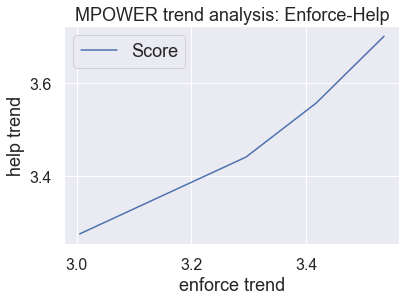

In [8]:
plt.figure(figsize=(6,4))

plt.plot(enforce_trend, help_trend, label='Score')
plt.xlabel("enforce trend", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("help trend", fontsize=18)
plt.yticks(fontsize=16)
plt.title("MPOWER trend analysis: Enforce-Help", fontsize=18)
plt.legend(fontsize=18, frameon=True)

plt.show()

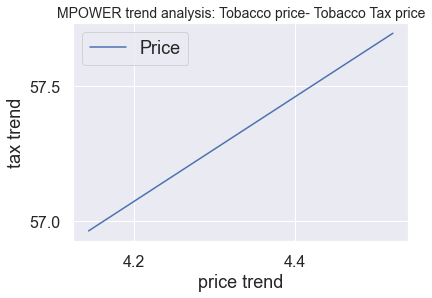

In [9]:
plt.figure(figsize=(6,4))

plt.plot(price_trend, tax_trend, label='Price')
plt.xlabel("price trend", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("tax trend", fontsize=18)
plt.yticks(fontsize=16)
plt.title("MPOWER trend analysis: Tobacco price- Tobacco Tax price", fontsize=14)
plt.legend(fontsize=18, frameon=True)

plt.show()

In [10]:
# Top countries that are putting much effort in MPOWER(Enforce ban, Help to quit)
# Brazil, Iran, Panama, Turkey, United Arab Emirates, Uruguay
stop_df[stop_df['EnforceBansTobaccoAd'] == 5][stop_df['HelpToQuit'] == 5][['Entity', 'Year', 'EnforceBansTobaccoAd', 'HelpToQuit']][:10]

,Entity,Year,EnforceBansTobaccoAd,HelpToQuit
24,Brazil,2012,5,5
25,Brazil,2014,5,5
87,Iran,2012,5,5
88,Iran,2014,5,5
137,Panama,2012,5,5
138,Panama,2014,5,5
183,Turkey,2012,5,5
184,Turkey,2014,5,5
190,United Arab Emirates,2014,5,5
196,Uruguay,2014,5,5


In [11]:
stop_df[stop_df['EnforceBansTobaccoAd'] == 5][stop_df['HelpToQuit'] == 5]['Entity'].unique()

array(['Brazil', 'Iran', 'Panama', 'Turkey', 'United Arab Emirates',
       'Uruguay'], dtype=object)

In [12]:
# Bottom countries that are putting much effort in MPOWER(Enforce ban, Help to quit)
# Burundi, Comoros, Rwanda, Sierra Leone, Bhutan
stop_df[stop_df['EnforceBansTobaccoAd'] == 2][stop_df['HelpToQuit'] == 2][['Entity', 'Year', 'EnforceBansTobaccoAd', 'HelpToQuit']][:10]

,Entity,Year,EnforceBansTobaccoAd,HelpToQuit
28,Burundi,2014,2,2
41,Comoros,2014,2,2
151,Rwanda,2014,2,2
159,Sierra Leone,2014,2,2
265,Bhutan,2007,2,2
289,Burundi,2007,2,2
290,Burundi,2010,2,2
291,Burundi,2012,2,2
316,Comoros,2007,2,2
318,Comoros,2012,2,2


In [13]:
stop_df[stop_df['EnforceBansTobaccoAd'] == 2][stop_df['HelpToQuit'] == 2][['Entity', 'Year', 'EnforceBansTobaccoAd', 'HelpToQuit']][:10]['Entity'].unique()

array(['Burundi', 'Comoros', 'Rwanda', 'Sierra Leone', 'Bhutan'],
      dtype=object)

## Result side: usage worldwide

### - Overall usage is decreasing for both genders

In [14]:
use_ww_df.head(3)

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value
0,SEAR,South-East Asia,PRK,Democratic People's Republic of Korea,2018,Female,0.0
1,EUR,Europe,AZE,Azerbaijan,2018,Female,0.2
2,AFR,Africa,ERI,Eritrea,2018,Female,0.3


In [15]:
# We have 2000, 2005, 2010, 2013~2018 results 
# MPOWER dataset has 2007, 2010, 2012, and 2014 data 
# If we consolidate both columns, we may only have 2010, 2014 dataset 

use_ww_df['Year'].value_counts().sort_index()

2000    447
2005    447
2010    447
2013    447
2014    447
2015    447
2016    447
2017    447
2018    447
Name: Year, dtype: int64

In [16]:
year_index = use_ww_df['Year'].value_counts().sort_index().index

In [17]:
usage_both_trend = []

for year in year_index:
    y_both = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Year'] == year]['Value'].mean()
    usage_both_trend.append(y_both)

usage_both_trend

[31.03624161073825,
 27.995302013422815,
 25.416778523489924,
 24.10402684563759,
 23.698657718120792,
 23.31006711409396,
 22.919463087248317,
 22.56778523489933,
 22.218791946308716]

In [18]:
usage_male_trend = []

for year in year_index:
    y_both = use_ww_df[use_ww_df['Gender'] =='Male'][use_ww_df['Year'] == year]['Value'].mean()
    usage_male_trend.append(y_both)

usage_male_trend

[43.62885906040266,
 40.0228187919463,
 36.869798657718114,
 35.195973154362406,
 34.68456375838927,
 34.181879194630866,
 33.67651006711409,
 33.21140939597316,
 32.76375838926175]

In [19]:
usage_female_trend = []

for year in year_index:
    y_both = use_ww_df[use_ww_df['Gender'] =='Female'][use_ww_df['Year'] == year]['Value'].mean()
    usage_female_trend.append(y_both)

usage_female_trend

[18.4469798657718,
 15.96644295302014,
 13.969798657718117,
 13.008724832214764,
 12.706040268456377,
 12.435570469798655,
 12.163758389261739,
 11.919463087248321,
 11.673825503355706]

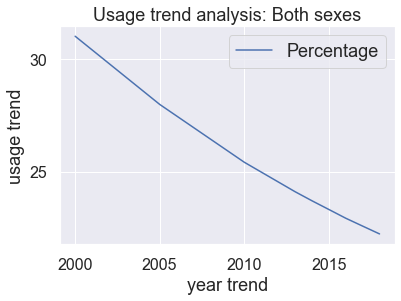

In [20]:
plt.figure(figsize=(6,4))


plt.plot(year_index, usage_both_trend, label='Percentage')


plt.xlabel("year trend", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("usage trend", fontsize=18)
plt.yticks(fontsize=16)
plt.title("Usage trend analysis: Both sexes", fontsize=18)
plt.legend(fontsize=18, frameon=True)

plt.show()

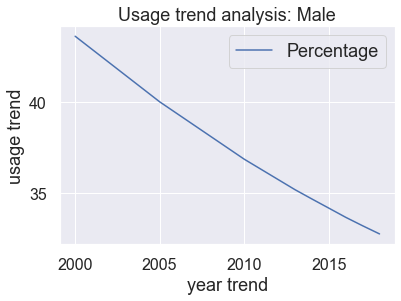

In [21]:
plt.figure(figsize=(6,4))


plt.plot(year_index, usage_male_trend, label='Percentage')
plt.xlabel("year trend", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("usage trend", fontsize=18)
plt.yticks(fontsize=16)
plt.title("Usage trend analysis: Male", fontsize=18)
plt.legend(fontsize=18, frameon=True)

plt.show()

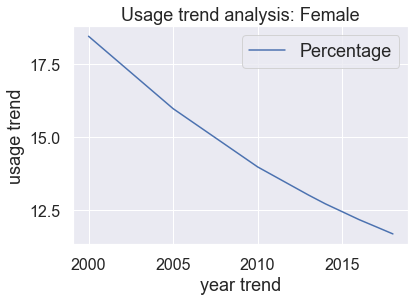

In [22]:
plt.figure(figsize=(6,4))

plt.plot(year_index, usage_female_trend, label='Percentage')
plt.xlabel("year trend", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("usage trend", fontsize=18)
plt.yticks(fontsize=16)
plt.title("Usage trend analysis: Female", fontsize=18)
plt.legend(fontsize=18, frameon=True)

plt.show()

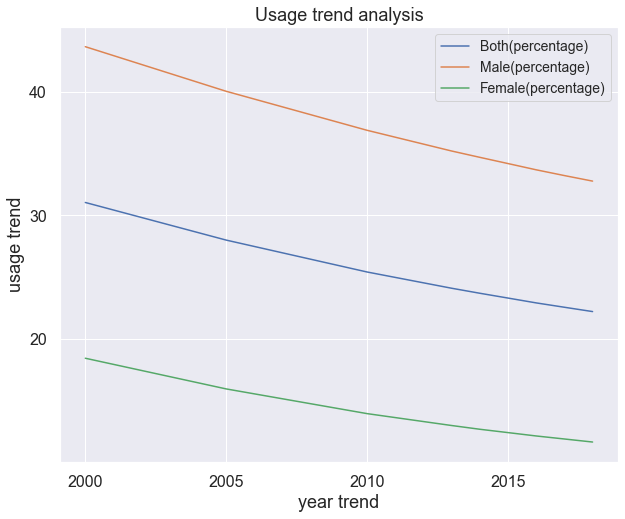

In [53]:
plt.figure(figsize=(10,8))

plt.plot(year_index, usage_both_trend, label='Both(percentage)')
plt.plot(year_index, usage_male_trend, label='Male(percentage)')
plt.plot(year_index, usage_female_trend, label='Female(percentage)')

plt.xlabel("year trend", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("usage trend", fontsize=18)
plt.yticks(fontsize=16)
plt.title("Usage trend analysis", fontsize=18)
plt.legend(fontsize=14, frameon=True)

plt.show()

In [23]:
# Countries that are not trending 
# Egypt, Niger, Congo, Portugal, Moldoba, Slovakia, Lesotho, Croatia

# plt.figure(figsize=(6,4))

# for cty in use_ww_df['Location'].unique():
#     year = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == cty].sort_values(by='Year')['Year']
#     value = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == cty].sort_values(by='Year')['Value']

#     plt.plot(year, value, label='Percentage')
#     plt.xlabel("year trend", fontsize=18)
#     plt.xticks(fontsize=16)
#     plt.ylabel("usage trend", fontsize=18)
#     plt.yticks(fontsize=16)
#     plt.title("Usage trend: {0}".format(cty), fontsize=16)
#     plt.legend(fontsize=18, frameon=True)
#     plt.show()

In [24]:
use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Egypt'].sort_values(by='Year')['Year'].astype('int')

3671    2000
3242    2005
2804    2010
2364    2013
1929    2014
1487    2015
1041    2016
600     2017
158     2018
Name: Year, dtype: int64

In [25]:
e_year = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Egypt'].sort_values(by='Year')['Year'].astype('int')
e_value = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Egypt'].sort_values(by='Year')['Value']

n_year = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Niger'].sort_values(by='Year')['Year'].astype('int')
n_value = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Niger'].sort_values(by='Year')['Value']

c_year = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Congo'].sort_values(by='Year')['Year'].astype('int')
c_value = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Congo'].sort_values(by='Year')['Value']

p_year = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Portugal'].sort_values(by='Year')['Year'].astype('int')
p_value = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Portugal'].sort_values(by='Year')['Value']

m_year = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Moldoba'].sort_values(by='Year')['Year'].astype('int')
m_value = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Moldoba'].sort_values(by='Year')['Value']

s_year = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Slovakia'].sort_values(by='Year')['Year'].astype('int')
s_value = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Slovakia'].sort_values(by='Year')['Value']

l_year = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Lesotho'].sort_values(by='Year')['Year'].astype('int')
l_value = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Lesotho'].sort_values(by='Year')['Value']

cr_year = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Croatia'].sort_values(by='Year')['Year'].astype('int')
cr_value = use_ww_df[use_ww_df['Gender'] =='Both sexes'][use_ww_df['Location'] == 'Croatia'].sort_values(by='Year')['Value']




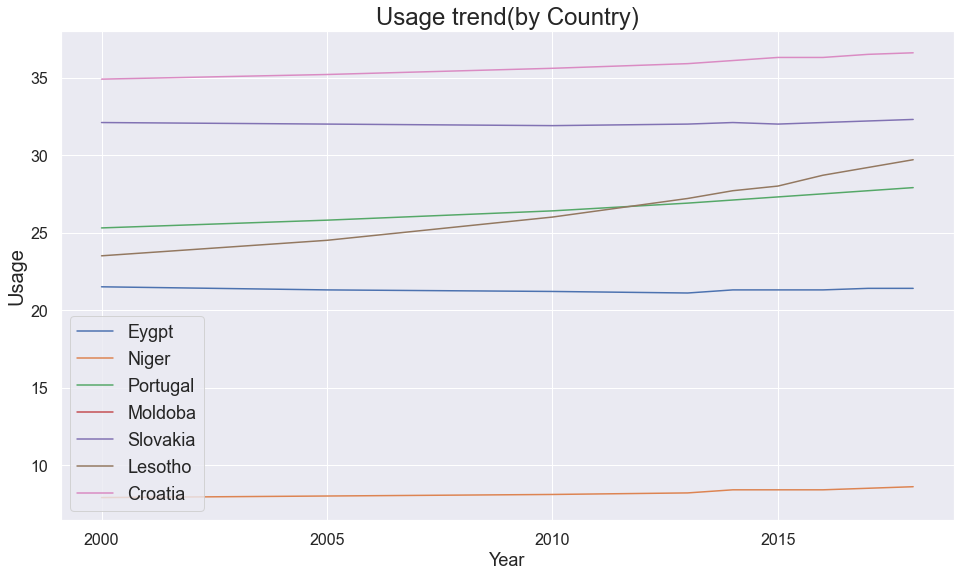

In [26]:
plt.figure(figsize=(16,9))

plt.plot(e_year, e_value, label='Eygpt')
plt.plot(n_year, n_value, label='Niger')
plt.plot(p_year, p_value, label='Portugal')
plt.plot(m_year, m_value, label='Moldoba')
plt.plot(s_year, s_value, label='Slovakia')
plt.plot(l_year, l_value, label='Lesotho')
plt.plot(cr_year, cr_value, label='Croatia')

plt.xlabel("Year", fontsize=18)
plt.xticks([2000, 2005, 2010, 2015], fontsize=16)
plt.ylabel("Usage", fontsize=20)
plt.yticks(fontsize=16)
plt.title("Usage trend(by Country)", fontsize=24)
plt.legend(fontsize=18, frameon=True)
plt.show()


## NULL Hypyothesis testing
### - Hypothesis: If countries put high effort on MPOWER, then tobacco usage would be less than those who are not putting effort
### - Null Hypothesis: Regardless of efforts in MPOWER, tobacco usage is same 


In [27]:
# merging two columns
use_ww_df.rename(columns = {'Location' : 'Entity'}, inplace = True)

In [28]:
model_1_df = stop_df.merge(use_ww_df, on = ['Entity', 'Year'])
model_1_df.head(3)

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value
0,Algeria,DZA,2014,2.09,40.9,4,4,AFR,Africa,DZA,Female,1.6
1,Algeria,DZA,2014,2.09,40.9,4,4,AFR,Africa,DZA,Both sexes,19.4
2,Algeria,DZA,2014,2.09,40.9,4,4,AFR,Africa,DZA,Male,37.3


In [29]:
model_1_df = model_1_df[model_1_df['Gender'] == 'Both sexes']
model_1_df.head(3)

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value
1,Algeria,DZA,2014,2.09,40.9,4,4,AFR,Africa,DZA,Both sexes,19.4
4,Argentina,ARG,2014,3.47,69.7,4,5,AMR,Americas,ARG,Both sexes,25.6
7,Armenia,ARM,2014,1.74,44.1,2,4,EUR,Europe,ARM,Both sexes,28.3


In [30]:
model_1_df = model_1_df[['Entity', 'Year', 'EnforceBansTobaccoAd', 'HelpToQuit', 'ParentLocation', 'Gender', 'Value']]
model_1_df.head(10)

,Entity,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocation,Gender,Value
1,Algeria,2014,4,4,Africa,Both sexes,19.4
4,Argentina,2014,4,5,Americas,Both sexes,25.6
7,Armenia,2014,2,4,Europe,Both sexes,28.3
10,Australia,2014,4,5,Western Pacific,Both sexes,18.2
13,Austria,2014,4,4,Europe,Both sexes,32.5
16,Azerbaijan,2014,4,3,Europe,Both sexes,21.1
18,Bahamas,2014,2,4,Americas,Both sexes,11.0
22,Bangladesh,2014,4,3,South-East Asia,Both sexes,41.1
25,Belarus,2014,4,4,Europe,Both sexes,28.7
28,Belgium,2014,4,5,Europe,Both sexes,25.9


In [31]:
model_1_df['MPOWER'] = (model_1_df['EnforceBansTobaccoAd'] + model_1_df['HelpToQuit']) / 2

In [32]:
model_1_df.head(10)

,Entity,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocation,Gender,Value,MPOWER
1,Algeria,2014,4,4,Africa,Both sexes,19.4,4.0
4,Argentina,2014,4,5,Americas,Both sexes,25.6,4.5
7,Armenia,2014,2,4,Europe,Both sexes,28.3,3.0
10,Australia,2014,4,5,Western Pacific,Both sexes,18.2,4.5
13,Austria,2014,4,4,Europe,Both sexes,32.5,4.0
16,Azerbaijan,2014,4,3,Europe,Both sexes,21.1,3.5
18,Bahamas,2014,2,4,Americas,Both sexes,11.0,3.0
22,Bangladesh,2014,4,3,South-East Asia,Both sexes,41.1,3.5
25,Belarus,2014,4,4,Europe,Both sexes,28.7,4.0
28,Belgium,2014,4,5,Europe,Both sexes,25.9,4.5


In [33]:
model_1_df['HelpToQuit'].value_counts()

4    138
3     86
5     32
2     18
Name: HelpToQuit, dtype: int64

In [34]:
model_1_df['EnforceBansTobaccoAd'].value_counts()

4    164
2     75
5     35
Name: EnforceBansTobaccoAd, dtype: int64

In [35]:
model_1_df['MPOWER'].mean()

3.625912408759124

In [36]:
model_1_df['MPOWER'].median()

4.0

In [37]:
# Create a function that divides movies into high/low popular movies
# If some movies are having exact same value as median, I won't be using those movies 
def high_low_check(x):
    
    if x > model_1_df['MPOWER'].median(): return 'high'
    elif x < model_1_df['MPOWER'].median(): return 'low'
    else: return 'same'
    
model_1_df['median_check'] = model_1_df['MPOWER'].apply(lambda x: high_low_check(x))

In [38]:
model_1_df['median_check'].value_counts()

low     127
same    108
high     39
Name: median_check, dtype: int64

In [39]:
# Create a function that divides movies into high/low popular movies
# If some movies are having exact same value as median, I won't be using those movies 
def high_low_check_mean(x):
    
    if x > model_1_df['MPOWER'].mean(): return 'high'
    elif x < model_1_df['MPOWER'].mean(): return 'low'
    else: return 'same'
    
model_1_df['mean_check'] = model_1_df['MPOWER'].apply(lambda x: high_low_check_mean(x))

In [40]:
model_1_df['mean_check'].value_counts()

high    147
low     127
Name: mean_check, dtype: int64

In [41]:
model_1_df.head(10)

,Entity,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocation,Gender,Value,MPOWER,median_check,mean_check
1,Algeria,2014,4,4,Africa,Both sexes,19.4,4.0,same,high
4,Argentina,2014,4,5,Americas,Both sexes,25.6,4.5,high,high
7,Armenia,2014,2,4,Europe,Both sexes,28.3,3.0,low,low
10,Australia,2014,4,5,Western Pacific,Both sexes,18.2,4.5,high,high
13,Austria,2014,4,4,Europe,Both sexes,32.5,4.0,same,high
16,Azerbaijan,2014,4,3,Europe,Both sexes,21.1,3.5,low,low
18,Bahamas,2014,2,4,Americas,Both sexes,11.0,3.0,low,low
22,Bangladesh,2014,4,3,South-East Asia,Both sexes,41.1,3.5,low,low
25,Belarus,2014,4,4,Europe,Both sexes,28.7,4.0,same,high
28,Belgium,2014,4,5,Europe,Both sexes,25.9,4.5,high,high


In [42]:
# now let's filter movies that are popluar
high_median = model_1_df[model_1_df.loc[:, 'median_check'] == 'high']['MPOWER']
low_median = model_1_df[model_1_df.loc[:, 'median_check'] == 'low']['MPOWER']

In [43]:
# now let's filter movies that are popluar
high_mean = model_1_df[model_1_df.loc[:, 'mean_check'] == 'high']['MPOWER']
low_mean = model_1_df[model_1_df.loc[:, 'mean_check'] == 'low']['MPOWER']

In [44]:
from scipy import stats

# Then, calculate p-value by using t-test(comparing mean values)

# p-value was relatively small(1.9139737699335403e-70) compared to significant level a=0.005
# reject null hypothesis and conclude that effort on MPOWER affects usage
t_test = stats.ttest_ind(high_mean, low_mean)
t_test

Ttest_indResult(statistic=24.396864568871283, pvalue=1.9139737699335403e-70)

In [45]:
from scipy import stats

# Then, calculate p-value by using Mann-Whitney U test(comparing median values)

# p-value was relatively small(3.072457430281832e-22) compared to significant level a=0.005
# reject null hypothesis and conclude that effort on MPOWER affects usage
u_test = stats.mannwhitneyu(high_median, low_median)
u_test

MannwhitneyuResult(statistic=4953.0, pvalue=3.072457430281832e-22)